1.
유방암 환자의 자료로 유방암 검증  
의미있는 속성을 검색하기 위해서 그래프를 활용  
속성중의 의미있는 속성만 추출하여 X 작성  
클래스 -> y 작성  
모델 실행후 마지막 정확도 출력

In [1]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data['data']
y = data['target']

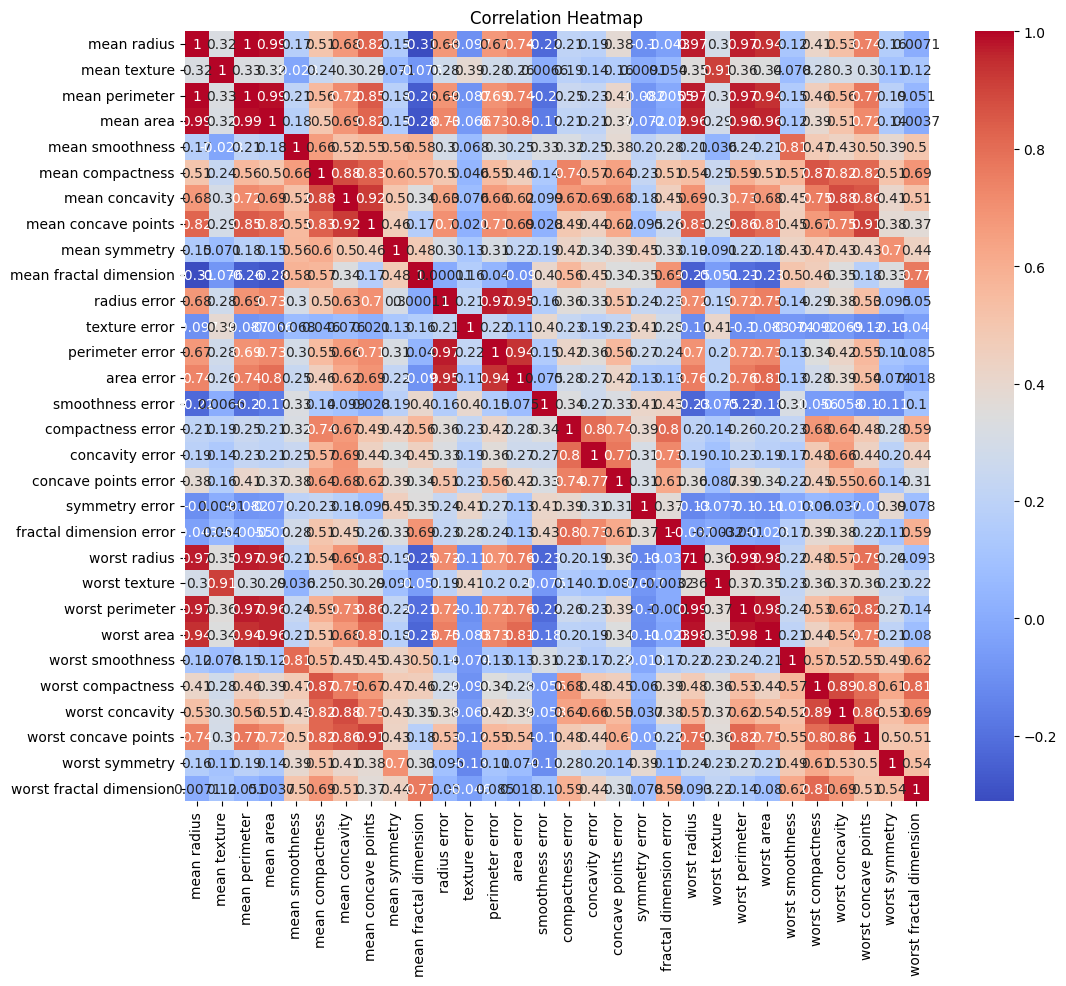

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.DataFrame(data.data, columns=data.feature_names)
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [2]:
def make_model(input_dim):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=32, activation='relu', input_shape=(input_dim,)),
        tf.keras.layers.Dense(units=16, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

In [3]:
model_bust = make_model(X.shape[1])
model_bust.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'], loss_weights=None,
              sample_weight_mode=None, weighted_metrics=None)
model_bust.fit(x=X, y=y,
          batch_size=32, epochs=50,
          verbose=0, validation_data=None,
          steps_per_epoch=None, validation_steps=None,
          validation_batch_size=None, validation_freq=1)

In [4]:
print(model_bust.history.history['loss'][-1], model_bust.history.history['accuracy'][-1])

0.2096145898103714 0.922671377658844


2. 
titanic 자료를 seaborn에서 load한 후에  
속성자료가 object 인 속성의 클래스 데이터를 one-hot encoding  
속성자료가 object 인데 클래스가 아닌 속성은 제거  
생존여부 -> alive : yes 또는 n 인경우 하나의 값을 출력  
생존에 영향을 끼치는 속성만 추출하여 모델 생성 후 학습 시킴

3. 
load_wine을 실행해서 다항분류의 모델링을 학습시킴